5.1 선형 SVM 분류

5.1.1 소프트 마진 분류

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np 

from sklearn.svm import SVC
from sklearn import datasets

#붓꽃 데이터 셋 
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1) #0 또는 1인것만 
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM 분류 모델
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

SVC(C=inf, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# 나쁜 모델
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    print('coef=',w)
    b = svm_clf.intercept_[0]
    print('intercept=',b)

    # 결정 경계에서 w0*x0 + w1*x1 + b = 0 이므로
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    print('margin=',margin)
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    print(svs)
    plt.scatter(svs[:, 0], svs[:, 1],s=180, facecolors='#FFAAAA') #support vector에 원 표시 s=size
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

coef= [1.29411744 0.82352928]
intercept= -3.7882347112962464
margin= 1.2142859118931788
[[1.9 0.4]
 [3.  1.1]]


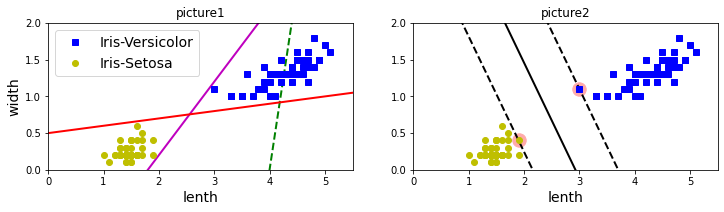

In [ ]:
plt.figure(figsize=(12,2.7))

plt.subplot(121)
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
plt.xlabel("lenth", fontsize=14)
plt.ylabel("width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title('picture1')
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")  #X[:,0] 꽃잎 길이
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")  #X[:,1] 꽃잎 넓이 
plt.xlabel("lenth", fontsize=14)
plt.title('picture2')
plt.axis([0, 5.5, 0, 2])


plt.show()

(0.0, 5.5, 0.0, 2.0)

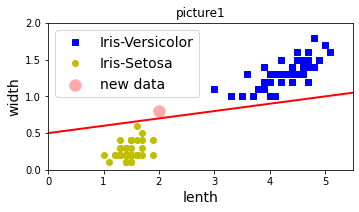

In [ ]:
#picture1 새로운 데이터 들어왔을 때 잘 작동 못하는 예

plt.figure(figsize=(12,2.7))

plt.subplot(121)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.scatter(2, 0.8 ,s=130, facecolors='#FFAAAA', label='new data')
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
plt.xlabel("lenth", fontsize=14)
plt.ylabel("width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title('picture1')
plt.axis([0, 5.5, 0, 2])

In [ ]:
svm_clf.predict([[5.1, 1.7]])

array([ True])

In [ ]:
#class가 3개일 때

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"].astype(int)  # Iris-Virginica
svm_clf = Pipeline([
        ("scaler", StandardScaler()), # 스케일링
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)), #hinge 손실 함수적용
    ])

svm_clf.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [ ]:
svm_clf.predict([[5.1, 1.7]])

array([2])

In [ ]:
#사이킷런을 통한 svc 분류기 사용
#클래스 1개 일 때

import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2)  # Iris-Virginica

svm_clf = Pipeline([
        ("scaler", StandardScaler()), # 스케일링
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)), #hinge 손실 함수적용
    ])

svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2,3)] # 꽃잎 길이, 너비
y = (iris["target"] == 2).astype(np.float64) # Iris-Virginica

svm_clf = Pipeline([ ("scaler", StandardScaler()), ("linear_svc", LinearSVC(C=1, loss="hinge")), ])

svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [ ]:
svm_clf.predict([ [5.5, 1.7] ])

array([1.])

5.2 비선형 SVM 분류

In [ ]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15)
polynomial_svm_clf = Pipeline( [("poly_features", PolynomialFeatures(degree=3)), ("scaler", StandardScaler()), ("svm_clf", LinearSVC(C=10, loss="hinge"))] )
polynomial_svm_clf.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

5.2.1 다항식 커널

In [ ]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([ ("scaler", StandardScaler()), ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5)) ])
polynomial_svm_clf.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

5.2.2 유사도 특성

5.2.3 가우시안 RBF 커널

In [ ]:
rbf_kernel_svm_clf = Pipeline([ ("scaler", StandardScaler()), ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001)) ])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=0.001, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

5.3 SVM 회귀

In [ ]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X,y)



LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [ ]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)

SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

5.4 SVM 이론